# Cluster visualization

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.colors import ListedColormap
from calibration import read_calibration_parameters, linear_calibration

In [24]:
# load training set
df_train = pd.read_csv('data/training_set.csv')

# load clustered data
df = pd.read_csv('data/clustered_data.csv')

In [25]:
param_clyc = read_calibration_parameters(
    "./calibration-parameters/clyc_linear_parameters.txt"
)

df_train.loc[:, "energy_calib"] = linear_calibration(df_train["energy"], param_clyc)
df.loc[:, "energy_calib"]       = linear_calibration(df["energy"], param_clyc)

In [26]:
# make a color palette that will be used for the plot
# the two colors are tab:blue and tab:orange

palette = ListedColormap(['tab:blue', 'tab:orange'])
sns_palette = sns.color_palette(["tab:blue", "tab:orange"])

## Training data

In [27]:
# rename the cluster column into "Particle"
# rename 0's with "Gamma" and 1's with "Neutron"

df_train = df_train.rename(columns={"cluster": "Particle"})
df_train.loc[df_train["Particle"] == 0, "Particle"] = "Gamma"
df_train.loc[df_train["Particle"] == 1, "Particle"] = "Neutron"

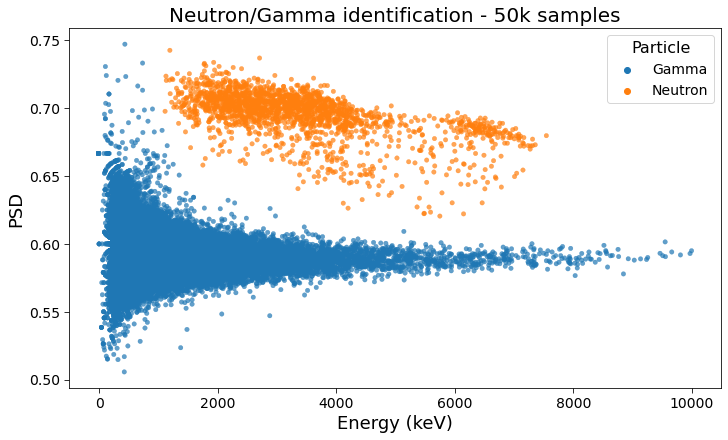

In [34]:
fig, ax = plt.subplots(figsize=(10, 6), constrained_layout=True)

sns.scatterplot(x='energy_calib', y='psd', hue='Particle', data=df_train, palette=sns_palette, alpha=0.7, edgecolor=None, ax=ax, s=20, legend=True)


ax.set_title('Neutron/Gamma identification - 50k samples', fontsize=20)
ax.set_xlabel('Energy (keV)', fontsize=18)
ax.set_ylabel('PSD', fontsize=18)

ax.tick_params(axis="both", which="major", labelsize=14, length=5)

ax.legend(fontsize=14, title_fontsize=16, title="Particle")

# save the figure
fig.savefig('plots/training-cluster.png', dpi=300, facecolor='w')

plt.show()

## Full data

In [29]:
df = df.rename(columns={"cluster": "Particle"})
df.loc[df["Particle"] == 0, "Particle"] = "Gamma"
df.loc[df["Particle"] == 1, "Particle"] = "Neutron"

In [30]:
# FINE TUNING

def line_from_points(p1, p2):
    m = (p2[1] - p1[1]) / (p2[0] - p1[0])
    q = p1[1] - m*p1[0]
    return m, q
m, q = line_from_points((0, 0.69), (3500, 0.62))

# if a neutron is below the line, it is a gamma
df.loc[(df["Particle"] == "Neutron") & (df["psd"] < m*df["energy_calib"] + q), "Particle"] = "Gamma"

# if a gamma has psd > 0.615 and energy between 3800 and 8000 keV, it is a neutron
df.loc[(df["Particle"] == "Gamma") & (df["psd"] > 0.615) & (df["energy_calib"] > 3800) & (df["energy_calib"] < 8000), "Particle"] = "Neutron"

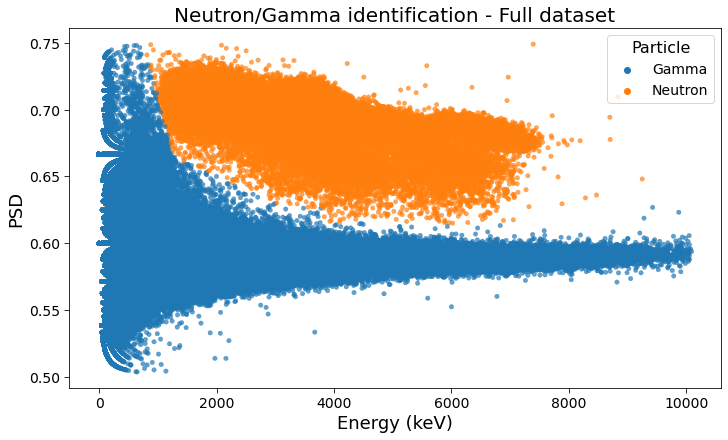

In [35]:
fig, ax = plt.subplots(figsize=(10, 6), constrained_layout=True)

sns.scatterplot(x='energy_calib', y='psd', hue='Particle', data=df, palette=sns_palette, alpha=0.7, edgecolor=None, ax=ax, s=20, legend=True)


ax.set_title('Neutron/Gamma identification - Full dataset', fontsize=20)
ax.set_xlabel('Energy (keV)', fontsize=18)
ax.set_ylabel('PSD', fontsize=18)


ax.tick_params(axis="both", which="major", labelsize=14, length=5)

ax.legend(fontsize=14, title_fontsize=16, title="Particle", loc="upper right")

# save the figure
fig.savefig('plots/full-cluster.png', dpi=300, facecolor='w')

plt.show()